In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = '.'
data_path = path + '/data'

model1_path = data_path + '/Optuna_Catboost_10Fold.csv'
model2_path = data_path + '/Optuna_Upgrade_Large_Total_DCNC_08Fold.csv'

model1_weight = 0.5
model2_weight = 0.5

In [7]:
model1 = pd.read_csv(model1_path)
model2 = pd.read_csv(model2_path)

In [8]:
print((model1['rating'] > 10).sum() , (model1['rating'] < 1).sum(), (model2['rating'] > 10).sum() , (model2['rating'] < 1).sum())

model1.loc[(model1['rating'] > 10)] = 10
model1.loc[(model1['rating'] < 1)] = 1

model2.loc[(model2['rating'] > 10)] = 10
model2.loc[(model2['rating'] < 1)] = 1

26 1 36 0


In [9]:
# temp = pd.read_csv(data_path + '/filtered_test_users.csv')
# temp = temp[['user_id','isbn','rating']]
# temp = temp[temp['rating'].notna()]

# model2 = model2.merge(temp, how = 'left', on = ['user_id', 'isbn'])
# model2['rating_y'] = model2['rating_y'].fillna(value = 0)
# feature2index = dict(zip(model2.columns, range(len(model2.columns))))
# model2['rating'] = model2.apply(lambda x : x[feature2index['rating_x']] if x[feature2index['rating_y']] == 0.0 \
#                                 else x[feature2index['rating_y']], axis = 1)
# model2 = model2[['user_id','isbn','rating']]

In [10]:
result = model1.merge(model2, how = 'left', on = ['user_id', 'isbn'])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77609 entries, 0 to 77608
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   77609 non-null  int64  
 1   isbn      77609 non-null  object 
 2   rating_x  77609 non-null  float64
 3   rating_y  77575 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


In [11]:
result.head(10)

,user_id,isbn,rating_x,rating_y
0,11676,0002005018,7.340143,6.628406
1,116866,0002005018,7.294330,7.678426
2,152827,0060973129,7.631610,7.488130
3,157969,0374157065,7.933504,7.279945
4,67958,0399135782,7.480600,8.149168
5,213191,0399135782,6.971424,6.698296
6,245827,0399135782,5.925091,5.453019
7,11676,0671870432,6.501915,6.437082
8,263256,1558746218,6.733593,7.350101
9,226745,1881320189,6.420594,7.427420


In [12]:
result['rating_y'] = result['rating_y'].fillna(value = 0.0)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77609 entries, 0 to 77608
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   77609 non-null  int64  
 1   isbn      77609 non-null  object 
 2   rating_x  77609 non-null  float64
 3   rating_y  77609 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


In [13]:
feature2index = dict(zip(result.columns, range(len(result.columns))))
result['rating'] = result.apply(lambda x : x[feature2index['rating_x']] if x[feature2index['rating_y']] == 0.0 \
                                else model1_weight * x[feature2index['rating_x']] + model2_weight * x[feature2index['rating_y']], axis = 1)

In [14]:
result.head(20)

,user_id,isbn,rating_x,rating_y,rating
0,11676,0002005018,7.340143,6.628406,6.984274
1,116866,0002005018,7.294330,7.678426,7.486378
2,152827,0060973129,7.631610,7.488130,7.559870
3,157969,0374157065,7.933504,7.279945,7.606724
4,67958,0399135782,7.480600,8.149168,7.814884
5,213191,0399135782,6.971424,6.698296,6.834860
6,245827,0399135782,5.925091,5.453019,5.689055
7,11676,0671870432,6.501915,6.437082,6.469499
8,263256,1558746218,6.733593,7.350101,7.041847
9,226745,1881320189,6.420594,7.427420,6.924007


In [15]:
result = result[['user_id', 'isbn', 'rating']]

In [16]:
result.head()

,user_id,isbn,rating
0,11676,0002005018,6.984274
1,116866,0002005018,7.486378
2,152827,0060973129,7.559870
3,157969,0374157065,7.606724
4,67958,0399135782,7.814884


In [17]:
result['rating'].isna().sum()

0

In [18]:
result.to_csv(data_path + '/submission_ensemble.csv', index=False)

<Axes: xlabel='rating', ylabel='Density'>

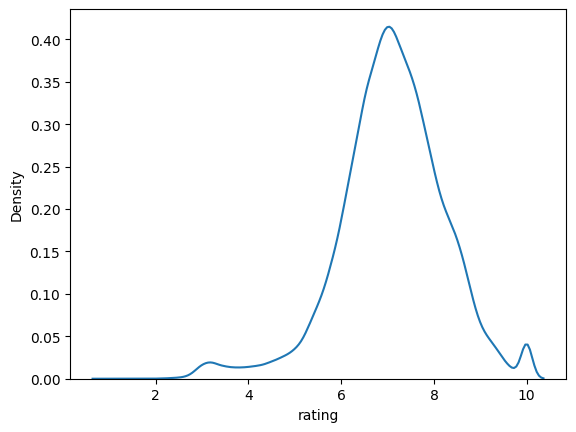

In [19]:
sns.kdeplot(result['rating'])

In [43]:
books_path = data_path + '/books_final.csv'
users_path = data_path + '/users_final.csv'
train_ratings_path = data_path + '/train_ratings.csv'
test_ratings_path = data_path + '/test_ratings.csv'

In [44]:
df_books = pd.read_csv(books_path)
df_users = pd.read_csv(users_path)
df_train_ratings = pd.read_csv(train_ratings_path)
df_test_ratings = pd.read_csv(test_ratings_path)

print('users shape: ', df_users.shape)
print('books shape: ', df_books.shape)
print('train ratings shape: ', df_train_ratings.shape)
print('test ratings shape: ', df_test_ratings.shape)

df_users['user_id'] = df_users['user_id'].astype(str)
df_train_ratings['user_id'] = df_train_ratings['user_id'].astype(str)
df_test_ratings['user_id'] = df_test_ratings['user_id'].astype(str)

users shape:  (68092, 7)
books shape:  (149570, 14)
train ratings shape:  (306795, 3)
test ratings shape:  (76699, 3)


In [45]:
# Cold_start, user_id, isbn을 제외하고 FeatureSet을 구성해야할 것 같음

train_user_id = set(df_train_ratings['user_id'].unique())
train_isbn = set(df_train_ratings['isbn'].unique())
print('train_user_id : {}, train_isbn : {}'.format(len(train_user_id), len(train_isbn)))

test_user_id = set(df_test_ratings['user_id'].unique())
test_isbn = set(df_test_ratings['isbn'].unique())
print('test_user_id : {}, test_isbn : {}'.format(len(test_user_id), len(test_isbn)))

users_user_id = set(df_users['user_id'].unique())
books_isbn = set(df_books['isbn'].unique())
print('users_user_id : {}, books_isbn : {}'.format(len(users_user_id), len(books_isbn)))

print()
print('Subtraction set A - set B')
print('test_user_id - train_user_id : {}'.format(len(test_user_id - train_user_id)))
print('test_isbn - train_user_id : {}'.format(len(test_isbn - train_isbn)))
print('train_user_id - users_user_id : {}'.format(len(train_user_id - users_user_id)))
print('train_isbn - books_isbn : {}'.format(len(train_isbn - books_isbn)))
print('test_user_id - users_user_id : {}'.format(len(test_user_id - users_user_id)))
print('test_isbn - books_isbn : {}'.format(len(test_isbn - books_isbn)))

train_user_id : 59803, train_isbn : 129777
test_user_id : 26167, test_isbn : 52000
users_user_id : 68092, books_isbn : 149570

Subtraction set A - set B
test_user_id - train_user_id : 8266
test_isbn - train_user_id : 19793
train_user_id - users_user_id : 0
train_isbn - books_isbn : 0
test_user_id - users_user_id : 0
test_isbn - books_isbn : 0


In [46]:
index1 = df_test_ratings[(df_test_ratings['user_id'].isin(train_user_id)) & (df_test_ratings['isbn'].isin(train_isbn))].index

In [47]:
index2 = df_test_ratings[(df_test_ratings['user_id'].isin(train_user_id)) & ~(df_test_ratings['isbn'].isin(train_isbn))].index

In [48]:
index3 = df_test_ratings[~(df_test_ratings['user_id'].isin(train_user_id)) & (df_test_ratings['isbn'].isin(train_isbn))].index

In [49]:
index4 = df_test_ratings[~(df_test_ratings['user_id'].isin(train_user_id)) & ~(df_test_ratings['isbn'].isin(train_isbn))].index

In [50]:
case1_path = data_path + '/Optuna_Total_DCNC_10Fold_1.csv'
case2_path = data_path + '/Optuna_Total_DCNC_5Fold_2.csv'
case3_path = data_path + '/Optuna_Total_DCNC_5Fold_3.csv'
case4_path = data_path + '/Optuna_Total_DCNC_5Fold_4.csv'

In [51]:
case1 = pd.read_csv(case1_path)
case2 = pd.read_csv(case2_path)
case3 = pd.read_csv(case3_path)
case4 = pd.read_csv(case4_path)

In [52]:
result = pd.concat([case1.loc[index1], case2.loc[index2], case3.loc[index3], case4.loc[index4]], axis = 0).sort_index()
result

,user_id,isbn,rating
0,11676,0002005018,6.701071
1,116866,0002005018,7.549474
2,152827,0060973129,7.580943
3,157969,0374157065,7.541555
4,67958,0399135782,8.043178
...,...,...,...
76694,278543,1576734218,6.563361
76695,278563,3492223710,6.187480
76696,278633,1896095186,6.738585
76697,278668,8408044079,4.954205


In [53]:
result.to_csv(data_path + '/submission_caseBycase.csv', index=False)

-0.8802172252856898


<Axes: xlabel='rating', ylabel='Density'>

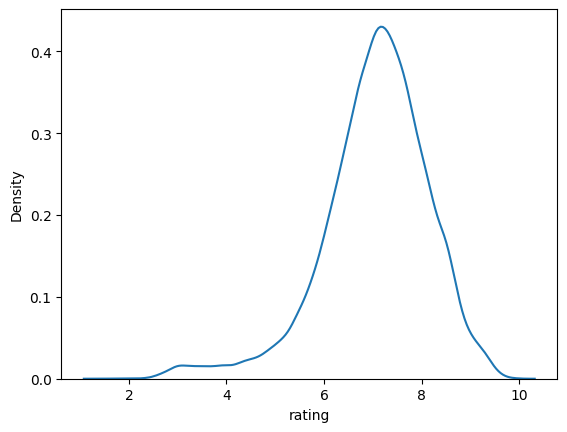

In [40]:
print(result['rating'].skew())
sns.kdeplot(result['rating'])

In [36]:
case_path = data_path + '/Optuna_Total_DCNC_10Fold.csv'
case = pd.read_csv(case_path)

-0.8979636090154356


<Axes: xlabel='rating', ylabel='Density'>

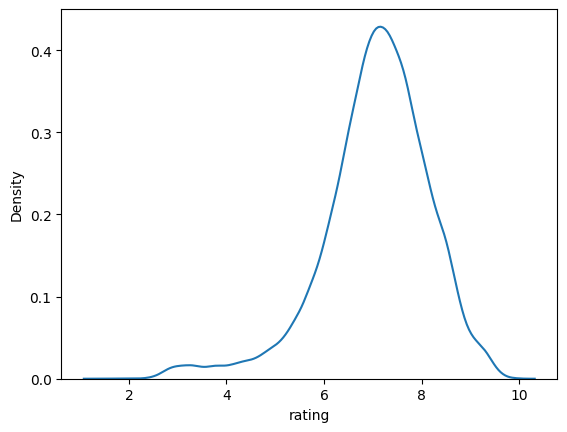

In [41]:
print(case['rating'].skew())
sns.kdeplot(case['rating'])

In [56]:
(result['user_id'] == case['user_id']).sum()

76699